## **Actividad Final del Módulo Ciencia de Datos e Inteligencia Artificial**

### **Alumno:** Velasteguí Izurieta Homero Javier
### **Programa:** Especialización en Programación con Python
### **Tema:** Detección de Ataques en Tráfico de Red


El presente proyecto utiliza el dataset [Cybersecurity 🪪 Intrusion 🦠 Detection Dataset](https://www.kaggle.com/datasets/dnkumars/cybersecurity-intrusion-detection-dataset) para entrenar un modelo de clasificación que permite identificar si un paquete determinado es malicioso o no.

Este conjunto de datos integra características basadas tanto en el comportamiento de red como en la actividad del usuario. Entre las variables de red más relevantes se incluyen el tamaño del paquete (network_packet_size), el tipo de protocolo de comunicación (protocol_type), y el tipo de cifrado utilizado (encryption_used).

Adicionalmente, el conjunto de datos incorpora variables de comportamiento del usuario, como la cantidad de intentos de inicio de sesión (login_attempts), duración de la sesión (session_duration), número de accesos fallidos (failed_logins), accesos fuera del horario habitual (unusual_time_access), reputación de la dirección IP (ip_reputation_score) y tipo de navegador utilizado (browser_type). Estas variables permiten modelar con mayor precisión actividades atípicas que podrían corresponder a intentos de intrusión, como ataques de fuerza bruta, accesos persistentes no autorizados, o uso de navegadores automatizados.

La variable objetivo del modelo es attack_detected, una etiqueta binaria que indica si se ha detectado o no un ataque en cada registro. Se utiliza un enfoque supervisado de aprendizaje automático para entrenar el modelo y realizar predicciones basadas en los patrones aprendidos.

### **1.- Importar Dataset y Librerías Necesarias** 
El dataset se descargó desde [Kaggle](https://www.kaggle.com/datasets/dnkumars/cybersecurity-intrusion-detection-dataset) y se incluyó dentro de assets con el nombre de cybersecurity_data.csv. Los datos del archivo csv se importan creando un dataset para explorar la información

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

path= os.path.join(".", "assets", "cybersecurity_data.csv")
df_ids=pd.read_csv(path, sep=",") 
display(df_ids.head(2))
display(df_ids.tail(2))
display(len(df_ids))

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0


,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
9535,SID_09536,406,TCP,4,86.664703,AES,0.537417,1,Chrome,1,0
9536,SID_09537,340,TCP,6,86.876744,NaN,0.277069,4,Chrome,1,1


9537

### **2.- Exploración de los datos**
El dataframe tiene un total de 9537 registros, en donde los índices van desde 0 a 9536. A continuación se explora los datos para identificar el tipo de datos y la existencia de valores nulos.

In [2]:
display(df_ids.describe())
display(df_ids.info())
nulos= df_ids.isnull().sum()
display(nulos)

,network_packet_size,login_attempts,session_duration,ip_reputation_score,failed_logins,unusual_time_access,attack_detected
count,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000
mean,500.430639,4.032086,792.745312,0.331338,1.517773,0.149942,0.447101
std,198.379364,1.963012,786.560144,0.177175,1.033988,0.357034,0.497220
min,64.000000,1.000000,0.500000,0.002497,0.000000,0.000000,0.000000
25%,365.000000,3.000000,231.953006,0.191946,1.000000,0.000000,0.000000
50%,499.000000,4.000000,556.277457,0.314778,1.000000,0.000000,0.000000
75%,635.000000,5.000000,1105.380602,0.453388,2.000000,0.000000,1.000000
max,1285.000000,13.000000,7190.392213,0.924299,5.000000,1.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9537 entries, 0 to 9536
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   session_id           9537 non-null   object 
 1   network_packet_size  9537 non-null   int64  
 2   protocol_type        9537 non-null   object 
 3   login_attempts       9537 non-null   int64  
 4   session_duration     9537 non-null   float64
 5   encryption_used      7571 non-null   object 
 6   ip_reputation_score  9537 non-null   float64
 7   failed_logins        9537 non-null   int64  
 8   browser_type         9537 non-null   object 
 9   unusual_time_access  9537 non-null   int64  
 10  attack_detected      9537 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 819.7+ KB


None

session_id                0
network_packet_size       0
protocol_type             0
login_attempts            0
session_duration          0
encryption_used        1966
ip_reputation_score       0
failed_logins             0
browser_type              0
unusual_time_access       0
attack_detected           0
dtype: int64

### **3.- Tratamiento de los Datos**
La columna encryption_used es la única que tiene valores nulos. Al revisar los datos únicos de la columna encryption_used  y la documentación de origen del dataset, se identifica que los valores nulos en esta columna corresponden a comunicaciones sin cifrado, por lo que se reemplazan los nulos por la cadena "TEXT", que representará las comunicaciones en texto plano.

En la exploración del tipo de datos se identifica que las columnas "session", "protocolo", "encryption", y "browser" no tienen valores numéricos. En estas columnas se revisan sus valores únicos para determinar la viabilidad de codificarlas como variables categóricas. 

Para el id se utiliza len con la finalidad de identificar posibles valores duplicados. Si el valor de len de esta es menor que la cantidad de registros se determinaría que existen sesiones duplicadas. En la exploración se identifica que este no es el caso. Para las columnas complementarias, basados en la documentación se realiza una exploración de sus valores únicos para codificarlos de manera posterior.

In [3]:
encryptions=df_ids["encryption_used"].unique()
display(encryptions)
df_ids["encryption_used"]=df_ids["encryption_used"].fillna("TEXT")
display(len(df_ids["session_id"].unique()))
display(df_ids["protocol_type"].unique())
display(df_ids["encryption_used"].unique())
display(df_ids["browser_type"].unique())

array(['DES', 'AES', nan], dtype=object)

9537

array(['TCP', 'UDP', 'ICMP'], dtype=object)

array(['DES', 'AES', 'TEXT'], dtype=object)

array(['Edge', 'Firefox', 'Chrome', 'Unknown', 'Safari'], dtype=object)

### **4.- Análisis de los Datos**
En el análisis del balanceo de los datos se observa que la variable objetivo tiene un 55% de información para tráfico no etiquetado como ataque, mientras que el 45% de datos se etiqueta como tráfico de ataques detectados. En si, existe un ligero desvalanceo de los datos, por lo que se utilizarán técnicas de estratificación en la separación de datos para prueba y entrenamiento.

In [4]:
#Verificar el balanceo de los datos:
print(df_ids['attack_detected'].value_counts(normalize=True))
features = df_ids.select_dtypes(include='number').columns.drop('attack_detected')

attack_detected
0    0.552899
1    0.447101
Name: proportion, dtype: float64


#### **4.1.- Análisis de Correlación.**
Se realizó un análisis de correlación de todas las variables numéricas para identificar posibles patrones entre ellas, utilizando como categoría la variable objetivo. De esta manera se podría establecer posibles diferencias estre tráfico de ataque y tráfico normal.
En los gráficos se puede observar que las distribuciones en el tamaño del paquete y la duración de las sesiones no presentan direfencias para los ataques detectados y el tráfico normal, por lo que se podría sugerir ignorar estas variables en el análisis.

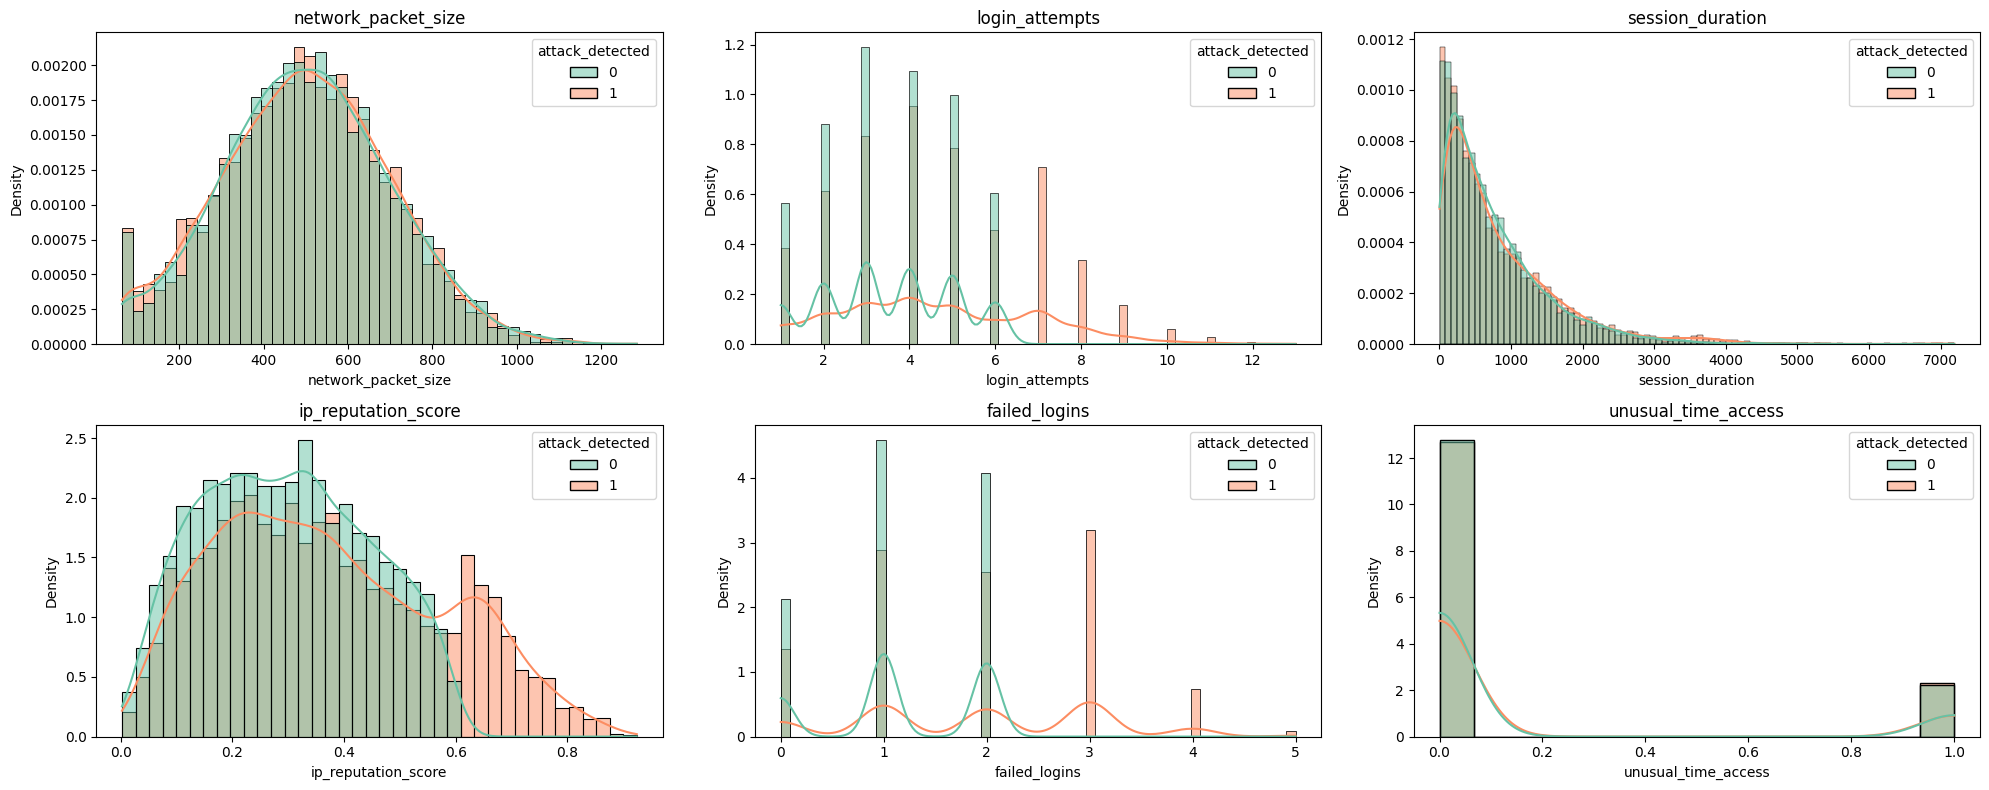

In [5]:
n = len(features)
cols = 3 
rows = (n + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 4))
axes = axes.flatten() 

for i, col in enumerate(features):
    sns.histplot(
        data=df_ids, x=col, hue='attack_detected',
        kde=True, stat='density', common_norm=False,
        palette='Set2', ax=axes[i]
    )
    axes[i].set_title(f'{col}')

# Eliminar ejes vacíos si hay menos plots que subplots creados
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### **4.2.- Gráfico de Cajas**
En el gráfico de cajas, en donde también se analizaron las variables numéricas se puede observar las mismas condiciones para las de invariabilidad para la duración de la sesión y tamaño del paquete. Sin embargo, en estas gráficas se puede determinar que en los intentos de login, la reputación, y los inicios de sesión fallidos existe una tendencia a que los ataques se produzacan cuando estos valores son más altos, compartiendo probabilidades en niveles bajos.  

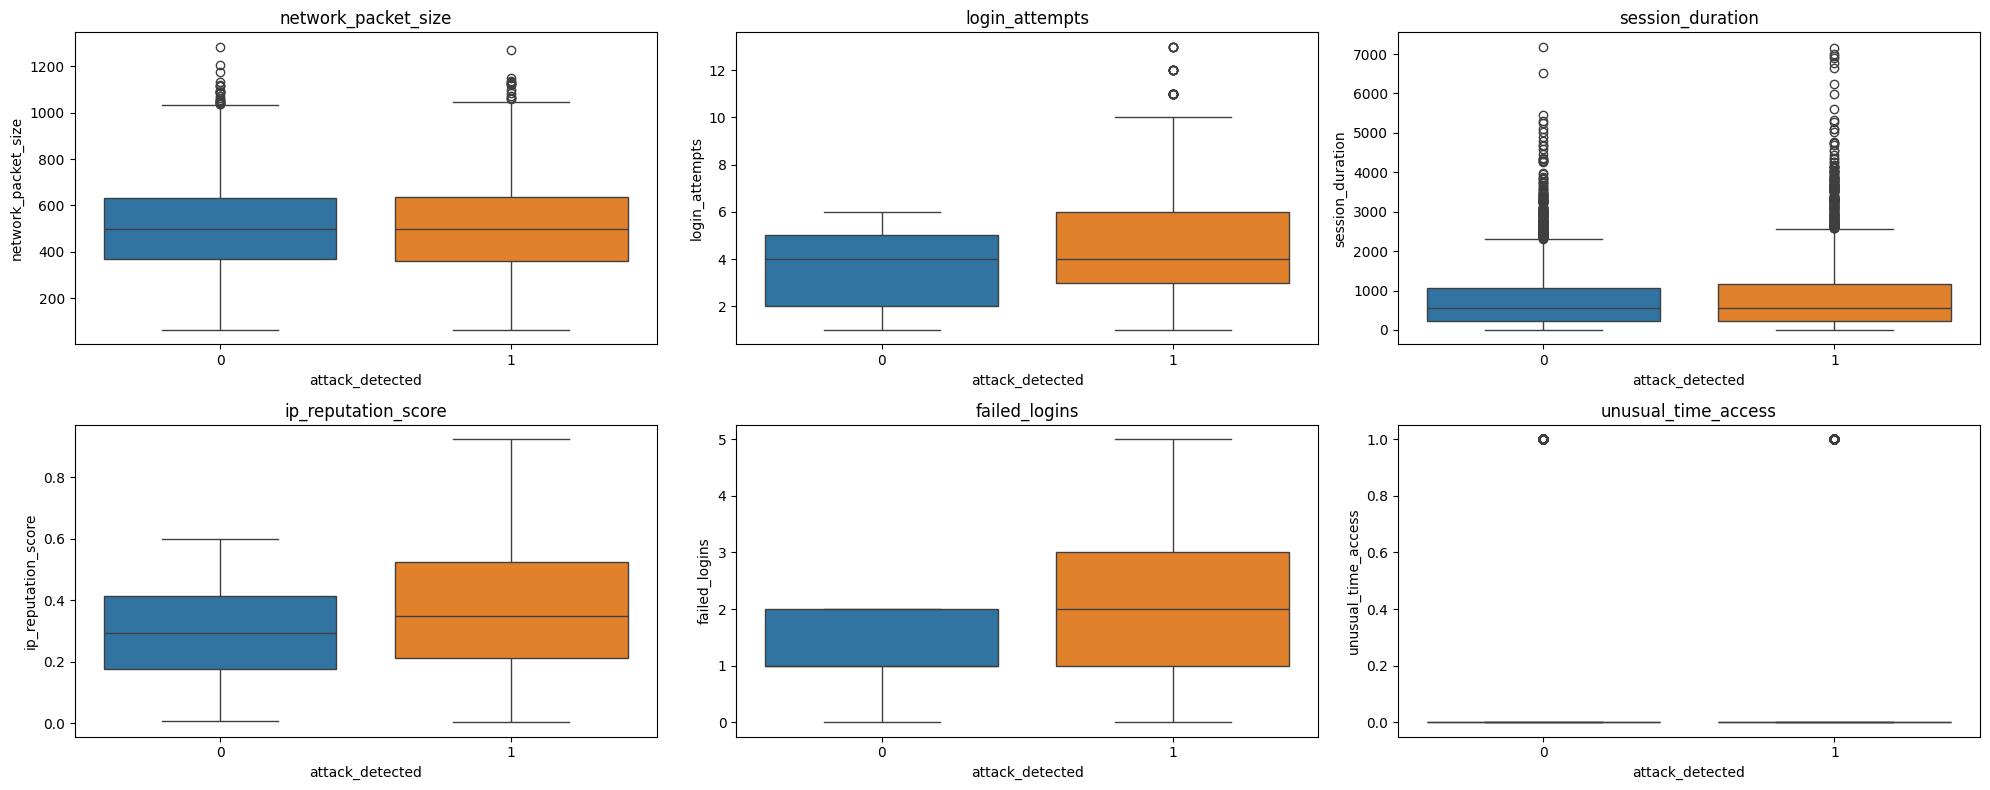

In [6]:
fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 4))
axes = axes.flatten()

for i, col in enumerate(features):
    sns.boxplot(data=df_ids, x='attack_detected', y=col, hue='attack_detected', ax=axes[i])
    axes[i].set_title(f'{col}')
    axes[i].legend_.remove()

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


#### **4.3.- Análisis de Variables Categóricas**
Se analizaron las variables categóricas de tipo de navegador, tipo de protocolo y encriptación utilizada. Considerando que existen mas datos de tráfico no etiquetado como ataque, se evidencia que para tipo de protocolo y encriptación utilizada el tráfico es ligeramente mayor para el tráfico no etiquetado como ataque, por lo que estas variables no serán consideradas en los modelos. En el tipo de navegador se identifica un comportamiento similar, sin embargo en el tráfico de navegadores desconocidos, se identifica que la situación es inversa, aunque la cantidad de información es mínima. Se considera mantener esta variable para entrenar los modelos.

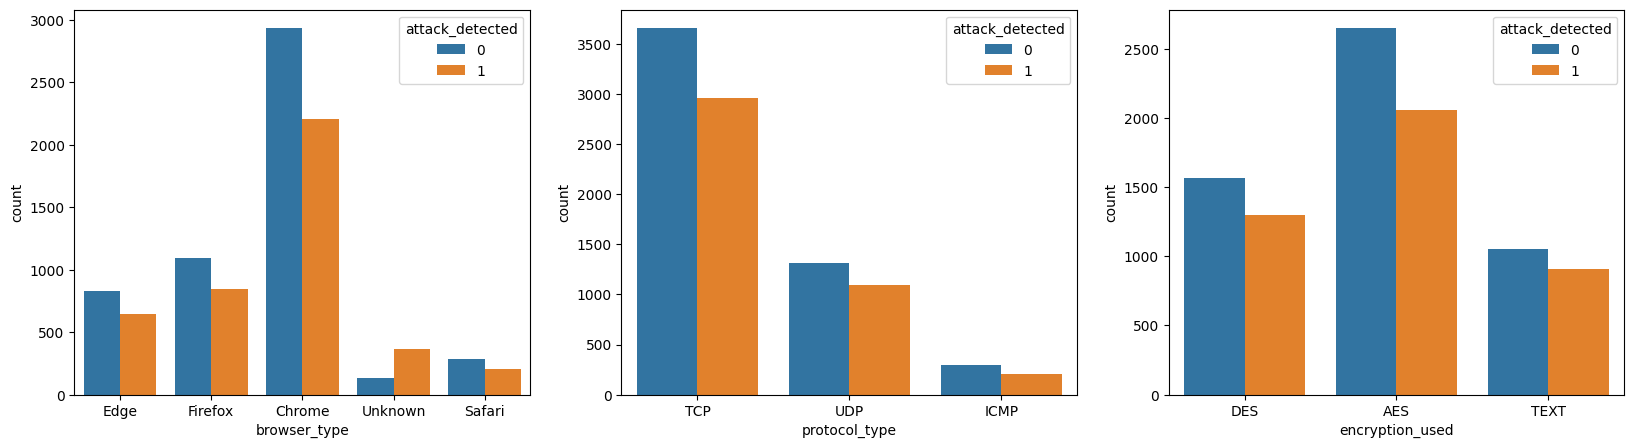

<Figure size 1000x600 with 0 Axes>

In [20]:
fig, ax= plt.subplots(1, 3, figsize=(20, 5))

plt.figure(figsize=(10, 6))
sns.countplot(data=df_ids, x='browser_type', hue='attack_detected', ax=ax[0])
sns.countplot(data=df_ids, x='protocol_type', hue='attack_detected', ax=ax[1])
sns.countplot(data=df_ids, x='encryption_used', hue='attack_detected', ax=ax[2])

plt.tight_layout()
plt.show()


#### **4.4.- Análisis de Distribución**
Reforzando las decisiones:

Los intentos de incio de sesión (login_attempts), evidencia que los valores más altos de intentos de inicio de sesión tienden a asociarse con una mayor detección de ataques. Esta relación es bastante clara y consistente a lo largo de los distintos tipos de cifrado, protocolos y navegadores, lo que sugiere que login_attempts es un buen predictor del comportamiento malicioso en el sistema. Es decir, a mayor cantidad de intentos de acceso, mayor probabilidad de que el evento sea clasificado como un ataque.

En la calificación de la reputación de las direcciones (ip_reputation_score), se identifica una fuerte relación entre los valores altos de esta variable (cercanos a 0.6) y la detección de ataques. Al contrario, los valores bajos del puntaje de reputación IP se asocian mayoritariamente con eventos no maliciosos. Esto indica que esta métrica, que probablemente evalúa el historial o confiabilidad de la dirección IP, es uno de los mejores indicadores predictivos de actividad sospechosa o maliciosa.

En cuanto a los inicios de sesión fallidos (failed_logins), algunos valores altos de intentos fallidos (<2) coinciden con la presencia de ataques, existe un considerable solapamiento con eventos legítimos, lo que reduce su poder predictivo individual. Algo similar ocurre con la variable unusual_time_access, ubicada en la cuarta columna. Si bien los accesos realizados en horarios inusuales (valor 1) se relacionan en algunos casos con ataques, la escasez de registros con este valor limita su utilidad como predictor fuerte.


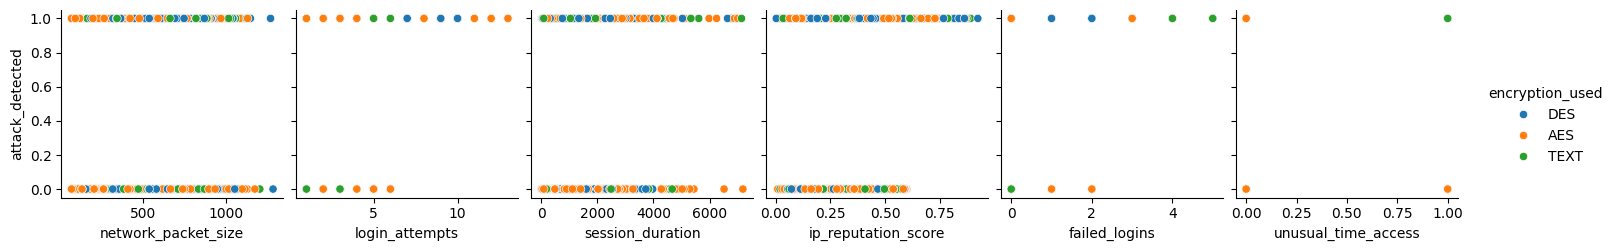

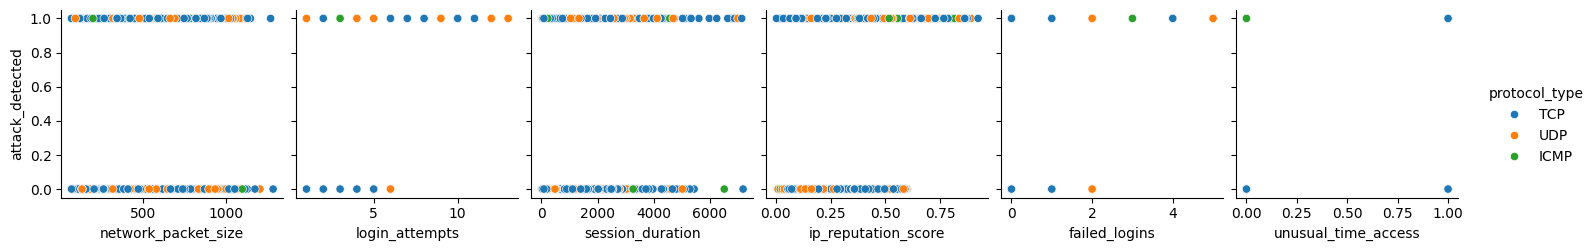

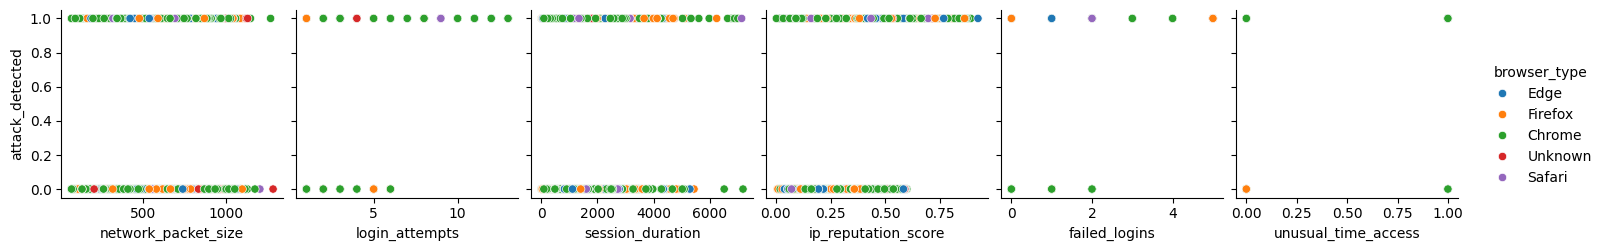

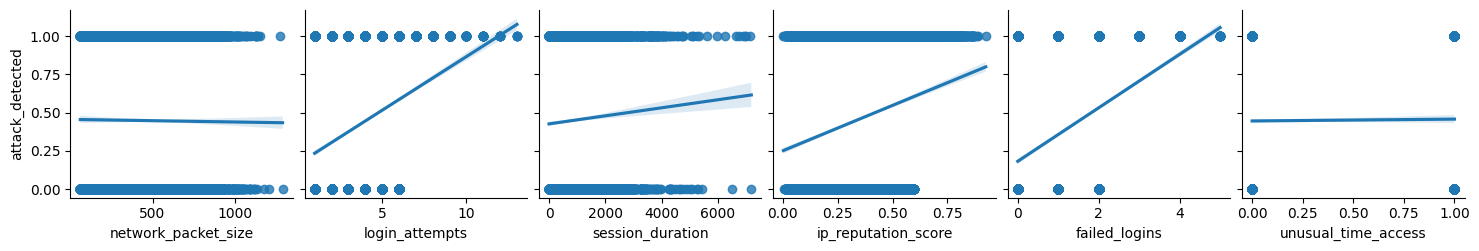

In [21]:
sns.pairplot(df_ids, x_vars=features.tolist(), y_vars='attack_detected', hue='encryption_used')
sns.pairplot(df_ids, x_vars=features.tolist(), y_vars='attack_detected', hue='protocol_type')
sns.pairplot(df_ids, x_vars=features.tolist(), y_vars='attack_detected', hue='browser_type')
sns.pairplot(df_ids, x_vars=features.tolist(), y_vars='attack_detected', kind='reg')

### **5.-Entrenamiento del Modelo** 
Preparación de los datos
La única variable categórica que se va a considerar es el tipo de navegador, por lo que esta variable será codificada con label encoder.
De forma posterior se eliminará la información que no se va a utilizar y se divide los datos en sets de entrenamiento y prueba, utilizando técnicas de estratificación.
Después se probarán modelos de regresión logística y kneighbors, realizando comparaciones entre ellos y manteniendo el de mejor ajuste.

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn import preprocessing

le=preprocessing.LabelEncoder()
lfit=le.fit(df_ids['browser_type'])
df_ids['browser_type']=le.transform(df_ids['browser_type'])

features=df_ids.select_dtypes(include="number").columns.drop(["attack_detected", "network_packet_size", "session_duration"])

x=df_ids[features]
y=df_ids["attack_detected"]

display(x.sample(5))

x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.4, random_state=42, stratify=y)

,login_attempts,ip_reputation_score,failed_logins,browser_type,unusual_time_access
374,6,0.384253,3,1,0
5032,5,0.195112,1,0,0
7930,3,0.253873,2,2,0
7253,6,0.302720,2,2,1
6476,1,0.686899,1,0,1


#### **5.1.-Regresión Logística**
Se crea un modelo de regresión logistica sin normalizar los datos.

In [24]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)


#### **Evaluación del Modelo de Regresión Logística**
En la evaluación del modelo se obtiene una precisión general del 73%, en donde se tiene una precisión del 74% para tráfico normal y 71% para tráfico de ataque. La sensibilidad por otro lado es de un 78% para el primer caso y 67% para el tráfico de ataques.

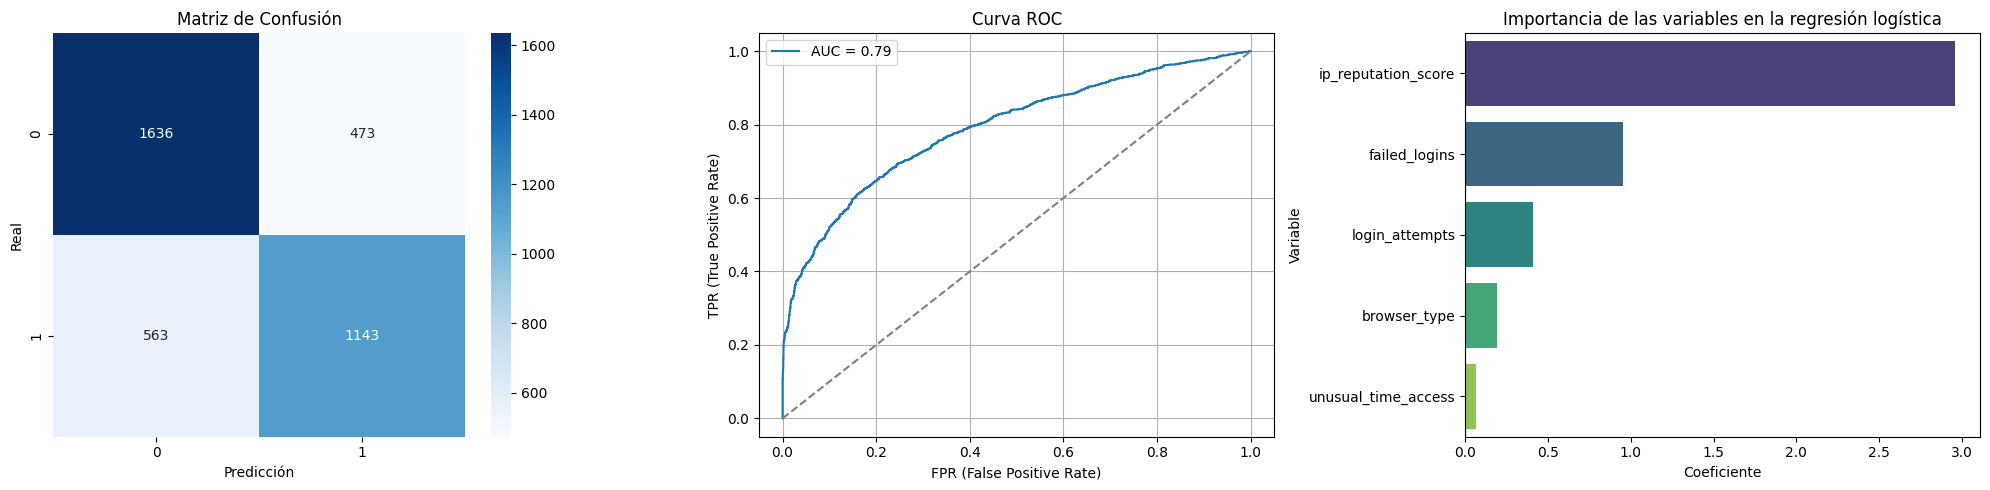

Reporte del modelo de clasificación:
              precision    recall  f1-score   support

           0       0.74      0.78      0.76      2109
           1       0.71      0.67      0.69      1706

    accuracy                           0.73      3815
   macro avg       0.73      0.72      0.72      3815
weighted avg       0.73      0.73      0.73      3815



In [25]:

fig, axes = plt.subplots(1, 3, figsize=(20, 5))

#Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_xlabel("Predicción")
axes[0].set_ylabel("Real")
axes[0].set_title("Matriz de Confusión")

## Curva ROC
y_proba = model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

axes[1].plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
axes[1].plot([0, 1], [0, 1], linestyle='--', color='gray')
axes[1].set_xlabel('FPR (False Positive Rate)')
axes[1].set_ylabel('TPR (True Positive Rate)')
axes[1].set_title('Curva ROC')
axes[1].legend()
axes[1].grid(True)


## Importarncia de las variables en la regresión

coeffs = pd.DataFrame({
    'Variable': x.columns,
    'Coeficiente': model.coef_[0]
}).sort_values(by='Coeficiente', key=abs, ascending=False)

sns.barplot(data=coeffs, x='Coeficiente', y='Variable', palette='viridis', hue='Variable', ax=axes[2])
axes[2].set_title('Importancia de las variables en la regresión logística')
axes[2].axvline(0, color='black', linewidth=0.8)


plt.tight_layout()
plt.show()
print("Reporte del modelo de clasificación:")
print(classification_report(y_test, y_pred))

#### **5.2.- Regresión Logística con Normalización de Datos**
Se valorará el modelos con valores escalados para identificar una posible mejora:

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

model = LogisticRegression(max_iter=1000)
model.fit(x_train_scaled, y_train)

y_pred = model.predict(x_test_scaled)

#### **Evaluación del Modelo de Regresión Logística con Datos Normalizados**
En el modelo entrenado con valores normalizados se la matriz de confusión tiene ligeras variaciones, sin embargo los valores de precisión y sensibilidad no varían.

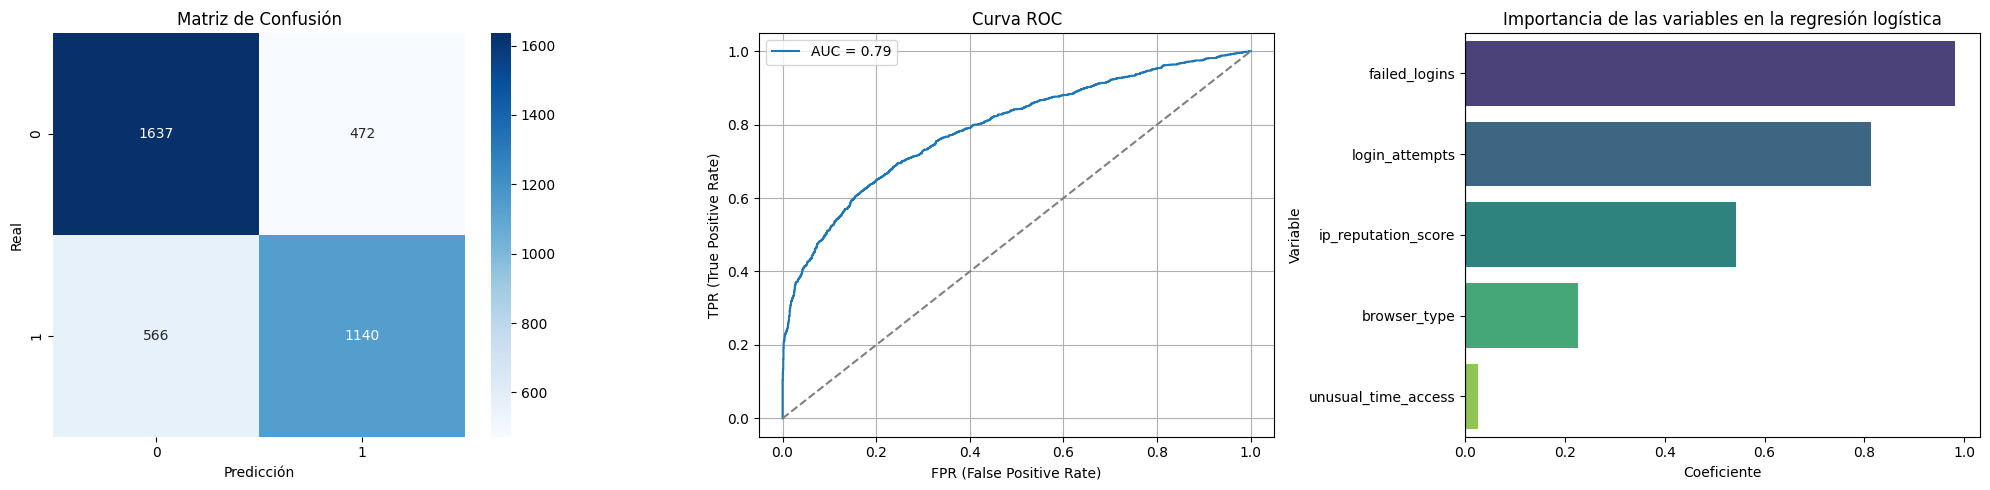

Reporte del modelo de clasificación:
              precision    recall  f1-score   support

           0       0.74      0.78      0.76      2109
           1       0.71      0.67      0.69      1706

    accuracy                           0.73      3815
   macro avg       0.73      0.72      0.72      3815
weighted avg       0.73      0.73      0.73      3815



In [29]:

fig, axes = plt.subplots(1, 3, figsize=(20, 5))

#Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_xlabel("Predicción")
axes[0].set_ylabel("Real")
axes[0].set_title("Matriz de Confusión")

## Curva ROC
y_proba = model.predict_proba(x_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

axes[1].plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
axes[1].plot([0, 1], [0, 1], linestyle='--', color='gray')
axes[1].set_xlabel('FPR (False Positive Rate)')
axes[1].set_ylabel('TPR (True Positive Rate)')
axes[1].set_title('Curva ROC')
axes[1].legend()
axes[1].grid(True)


## Importarncia de las variables en la regresión

coeffs = pd.DataFrame({
    'Variable': x.columns,
    'Coeficiente': model.coef_[0]
}).sort_values(by='Coeficiente', key=abs, ascending=False)

sns.barplot(data=coeffs, x='Coeficiente', y='Variable', palette='viridis', hue='Variable', ax=axes[2])
axes[2].set_title('Importancia de las variables en la regresión logística')
axes[2].axvline(0, color='black', linewidth=0.8)


plt.tight_layout()
plt.show()
print("Reporte del modelo de clasificación:")
print(classification_report(y_test, y_pred))

#### **Nota**
En regresión logística no se identifica una diferencia en la precisión en los modelos con normalización y sin normalización, sin embargo en KNeighbors se utilizará escalado para tener una mejor precisión.

#### **5.3.- Modelo KNeighborsClasifier**
Se explorará un modelo con KNeighbors para identificar si es posible mejorar el modelo. El modelo se entrena utilizando GridSearch, para encontrar el mejor valor de K entre 1 y 21. El mejor modelo se guarda en la variable knn_model, corresponde a un modelo con k=19, para el set de datos de entrenamiento.

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Normalización (si no se ha hecho aún)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Modelado con el K_best
param_grid = {'n_neighbors': list(range(1, 21))}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=20, scoring='accuracy')
grid.fit(x_train_scaled, y_train)

knn_model=grid.best_estimator_

print("Mejor k:", grid.best_params_)
print("Mejor score de validación:", grid.best_score_)

pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

Mejor k: {'n_neighbors': 19}
Mejor score de validación: 0.8746954265246947


,mean_test_score,std_test_score,params
0,0.805487,0.021076,{'n_neighbors': 1}
1,0.857392,0.016789,{'n_neighbors': 2}
2,0.843059,0.016562,{'n_neighbors': 3}
3,0.864380,0.017065,{'n_neighbors': 4}
4,0.860713,0.016334,{'n_neighbors': 5}
5,0.865781,0.018740,{'n_neighbors': 6}
6,0.867180,0.015314,{'n_neighbors': 7}
7,0.866830,0.015148,{'n_neighbors': 8}
8,0.868053,0.016717,{'n_neighbors': 9}
9,0.867353,0.015652,{'n_neighbors': 10}


#### **Evaluación del Modelo**
El nuevo modelo tiene una presición general del 88%, con el 98% de certeza para tráfico calificado como sospechoso y 83% para tráfico normal.Sin embargo, la sensibilidad es el 99% para tráfico normal y del 75% para tráfico detectado como ataque. 

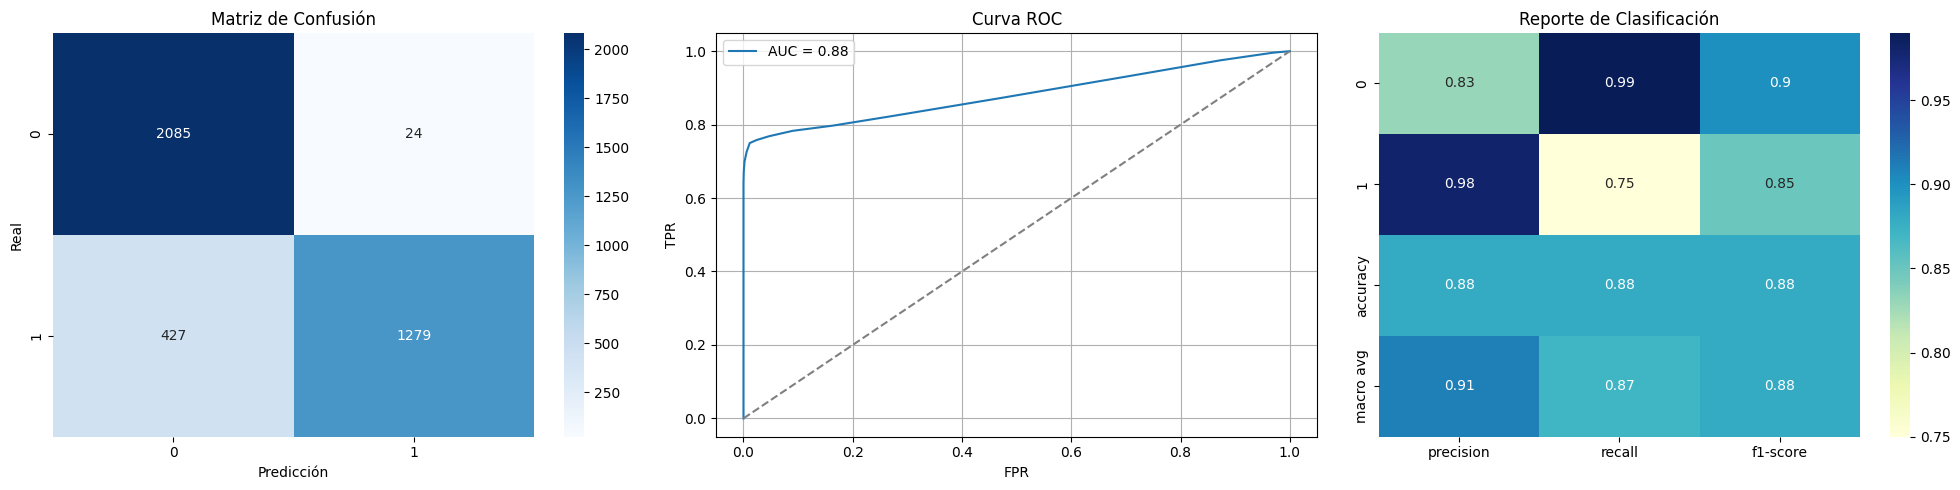

Reporte del modelo de clasificación:
              precision    recall  f1-score   support

           0       0.83      0.99      0.90      2109
           1       0.98      0.75      0.85      1706

    accuracy                           0.88      3815
   macro avg       0.91      0.87      0.88      3815
weighted avg       0.90      0.88      0.88      3815



In [32]:
# Predicciones
y_pred_knn = knn_model.predict(x_test_scaled)

# Gráficos
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Matriz de Confusión")
axes[0].set_xlabel("Predicción")
axes[0].set_ylabel("Real")

# Curva ROC
y_proba_knn = knn_model.predict_proba(x_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba_knn)
roc_auc = roc_auc_score(y_test, y_proba_knn)
axes[1].plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
axes[1].plot([0, 1], [0, 1], linestyle='--', color='gray')
axes[1].set_title('Curva ROC')
axes[1].set_xlabel('FPR')
axes[1].set_ylabel('TPR')
axes[1].legend()
axes[1].grid(True)

# Reporte de clasificación
report = classification_report(y_test, y_pred_knn, output_dict=True)
report_df = pd.DataFrame(report).transpose().round(2)
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="YlGnBu", ax=axes[2])
axes[2].set_title("Reporte de Clasificación")

plt.tight_layout()
plt.show()

print("Reporte del modelo de clasificación:")
print(classification_report(y_test, y_pred_knn))

#### **Análisis:**
El modelo de KNeighbors es mejor que los modelos anteriores de regresión logística. Se utilizará este modelo. A continuación se realizará la validación cruzada para identificar un posible sobreentrenamiento.

### **6.- Validación Cruzada**
El modelo de clasificación muestra un buen desempeño general, sin evidencias claras de sobreentrenamiento. En el conjunto de prueba, el modelo alcanza una precisión del 98% para la clase 1 (ataques detectados), lo cual indica que, cuando predice un ataque, casi siempre acierta. El recall para la clase 1 es del 75%, lo que significa que detecta tres de cada cuatro ataques reales, dejando escapar el 25%. La precisión para la clase 0 (tráfico no malicioso) también es alta, del 83%, y su recall llega al 99%, lo que implica que casi todo el tráfico legítimo es identificado correctamente. La exactitud global (accuracy) es del 88%, y los promedios macro y ponderado de F1-score se mantienen alrededor de 0.88, lo que indica un equilibrio adecuado entre ambas clases.

Comparando estos resultados con los obtenidos en la validación cruzada, se observa una consistencia notable. El mejor valor de exactitud alcanzado en los 20 folds fue del 89%, y el peor, del 82%, lo que muestra una variación esperada y aceptable. La media de accuracy obtenida en la validación cruzada es del 86.9%, muy cercana al 88% obtenido en el conjunto de prueba. Esta cercanía entre los resultados de validación y test sugiere que el modelo generaliza bien a datos no vistos y no está sobreajustado al conjunto de entrenamiento.

Por otro lado en el modelo de regresión logística la validación es del 73%, por lo que se ajusta al valor de accuracy obtenido en ese modelo. Sin embargo por mucho, el mejor modelo es el de KNeighbors.

In [33]:
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

k_range=list(range(1, 20))
best_k=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn, x_train, y_train, cv=20, scoring='accuracy')
    best_k.append(scores.mean())
print("OK")
best_kvalue=np.argmax(best_k)+1
print(best_kvalue)

OK
4


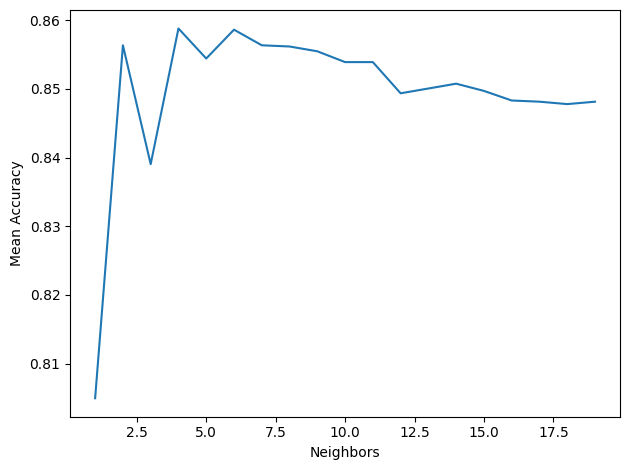

Best Accuracy:0.8587899904973076
Best K value:4
[0.88050314 0.87840671 0.88888889 0.86582809 0.8490566  0.86792453
 0.82599581 0.87421384 0.86792453 0.87002096 0.89098532 0.88888889
 0.87002096 0.86582809 0.85953878 0.87421384 0.86373166 0.87394958
 0.85714286 0.87605042]
0.8694556753519016


In [34]:
fig, ax=plt.subplots()
ax.plot(k_range, best_k)
ax.set_xlabel("Neighbors")
ax.set_ylabel("Mean Accuracy")

plt.tight_layout()
plt.show()

print("Best Accuracy:", end='')
print(np.amax(best_k))
print("Best K value:", end='')
print(best_kvalue)


knn_cv=KNeighborsClassifier(n_neighbors=best_kvalue)
#knn_cv=KNeighborsClassifier(n_neighbors=5)

scores=cross_val_score(knn_cv, x, y, cv=20, scoring='accuracy')
print(scores)
print(scores.mean())

In [18]:
from sklearn.linear_model import LogisticRegression

log_model=LogisticRegression(solver='liblinear')
score_log=cross_val_score(log_model, x, y, cv=10, scoring='accuracy')
print(score_log.mean())

0.7343010376588552


### **7.- Ajuste de Clases**

Se utilizará el modelo de knn con el best_k, que es el modelo que mejor presición tiene y que se ajusta con la validación cruzada como modelo para ajustar las clases.

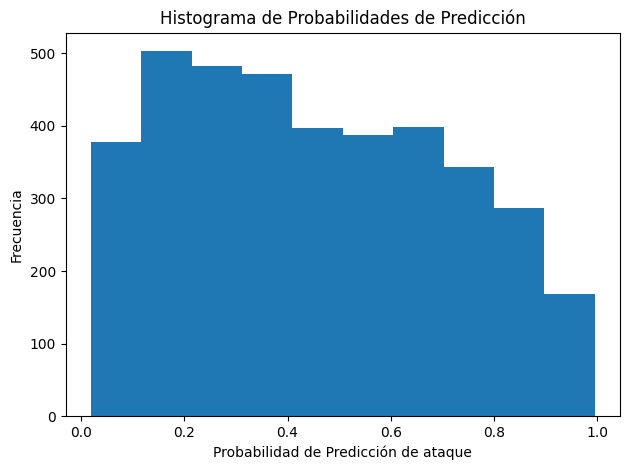

In [35]:
final_model=grid.best_estimator_

yf_pred = final_model.predict(x_test_scaled)
yf_prob = final_model.predict_proba(x_test_scaled)[:, 1]

fig, ax =plt.subplots();

ax.hist(y_proba)
ax.set_title("Histograma de Probabilidades de Predicción")
ax.set_xlabel("Probabilidad de Predicción de ataque")
ax.set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()




In [21]:
from sklearn.preprocessing import binarize

yf_pred_class=binarize([yf_prob], threshold=0.4)[0]
pd.DataFrame([yf_pred_class[:10], yf_prob[:10]])

cmf=confusion_matrix(y_test, yf_pred_class)
print(cm)
print(cmf)
mean_auc=cross_val_score(final_model, x, y, cv=10, scoring='roc_auc').mean()

[[2085   24]
 [ 427 1279]]
[[2010   99]
 [ 395 1311]]


### **Decisión**

Al bajar un poco el umbral la cantidad de falsos positivos se dispara. Esto puede provocar que múltiples clientes legítimos se queden sin conectividad. En tal circunstancia, para priorizar el servicio y dado que se tiene un modelo con un ajuste bueno y muy cercano a la validación cruzada, además de un área bajo la curva superior a 0.7 (0.88), se mantiene el umbral por defecto de 0.5, por lo que no se utilizará un ajuste por clases para predecir.